# FACE MASK DETECTOR IN FASTAI 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!unzip "/content/drive/My Drive/dataset1.zip"

Archive:  /content/drive/My Drive/dataset1.zip
   creating: dataset/
   creating: dataset/without_mask/
  inflating: dataset/without_mask/23.jpg  
  inflating: dataset/without_mask/229.jpg  
  inflating: dataset/without_mask/228.jpg  
  inflating: dataset/without_mask/227.jpg  
  inflating: dataset/without_mask/226.jpg  
  inflating: dataset/without_mask/225.jpg  
  inflating: dataset/without_mask/224.jpg  
  inflating: dataset/without_mask/223.jpg  
  inflating: dataset/without_mask/222.jpg  
  inflating: dataset/without_mask/221.jpg  
  inflating: dataset/without_mask/220.jpg  
  inflating: dataset/without_mask/22.jpg  
  inflating: dataset/without_mask/218.jpg  
  inflating: dataset/without_mask/217.jpg  
  inflating: dataset/without_mask/216.jpg  
  inflating: dataset/without_mask/215.jpg  
  inflating: dataset/without_mask/214.jpg  
  inflating: dataset/without_mask/213.jpg  
  inflating: dataset/without_mask/212.jpg  
  inflating: dataset/without_mask/211.jpg  
  inflating: datas

###### LOADING THE LIBRARIES

In [2]:
from fastai import *
from fastai.vision import *
import warnings
warnings.filterwarnings('ignore')

%reload_ext autoreload
%autoreload 2
%autosave 180

Autosaving every 180 seconds


###### WE HAVE 2 CLASSES --WITH_MASK AND WITHOUT_MASK

In [0]:
classes = ['with_mask','without_mask']
path  = 'dataset/'

In [4]:
for c in classes:
    print(c)
    verify_images(path +"/"+c, delete=True, max_workers=8)

with_mask


without_mask


###### LOADING THE DATASET

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [6]:
data.classes

['with_mask', 'without_mask']

###### IMAGES IN THE DATASET

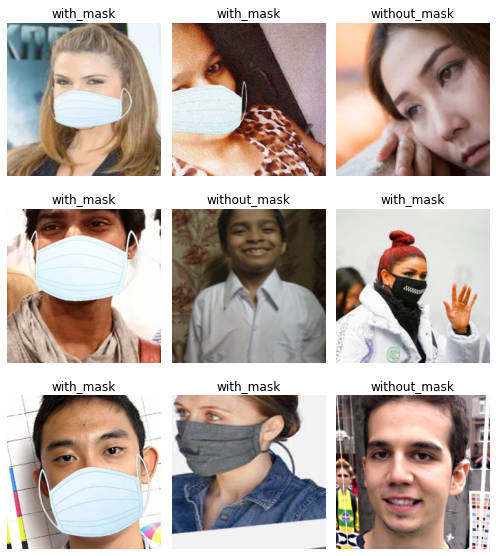

In [7]:
data.show_batch(rows=3, figsize=(7,8))

In [8]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['with_mask', 'without_mask'], 2, 1537, 384)

###### TRAINING THE MODEL

In [0]:
learn = create_cnn(data, models.vgg16_bn, metrics=accuracy)

In [10]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.431697,0.043521,0.984375,00:26
1,0.220273,0.010677,0.997396,00:27
2,0.139079,0.009400,1.000000,00:25


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [13]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


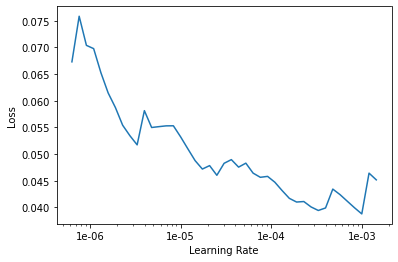

In [14]:
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.037403,0.135256,0.963542,00:27
1,0.048249,0.004760,0.997396,00:26


In [16]:
learn.save('stage-2', return_path=True)

PosixPath('dataset/models/stage-2.pth')

In [17]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (1537 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
with_mask,with_mask,with_mask,with_mask,with_mask
Path: dataset;

Valid: LabelList (384 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
with_mask,without_mask,with_mask,with_mask,with_mask
Path: dataset;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): MaxPool2d(kernel_size=2, stride=2, padding

In [18]:
interp = ClassificationInterpretation.from_learner(learn)

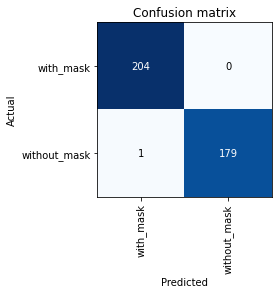

In [19]:
interp.plot_confusion_matrix()

###### PREDICTION

In [0]:
img1 = open_image("mask1.jpeg")
img2 = open_image("nomask1.jpeg")


In [22]:
classes = ['with_mask', 'without_mask']
data2 = ImageDataBunch.single_from_classes(path, classes, size=224).normalize(imagenet_stats)
learn = cnn_learner(data2, models.vgg16_bn)
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (0 items)
x: ImageList

y: CategoryList

Path: dataset;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: dataset;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (9): ReLU(inplace=True)
      (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding

with_mask


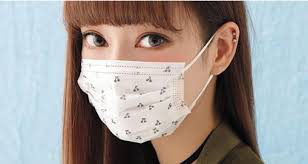

In [23]:
pred_class,pred_idx,outputs = learn.predict(img1)
print(pred_class)
img1

without_mask


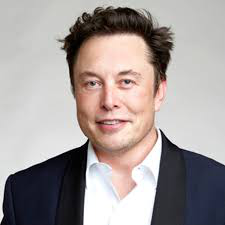

In [24]:
pred_class,pred_idx,outputs = learn.predict(img2)
print(pred_class)
img2